## Problem: Predict whether the patient has heart disease or not based on the clinical data


### 1. Load the dataset


In [1]:
# Source: https://archive.ics.uci.edu/dataset/45/heart+disease
# Authors: Andras Janosi, William Steinbrunn and others

# We are going to use a subset of the original dataset.

import pandas as pd

df = pd.read_csv("data/heart-disease.csv")
# df = pd.read_csv("../data/heart-disease.csv") # Read from local directory, 'DataFrame' shortened to 'df'
df.shape  # (rows, columns)

(303, 14)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Evaluation metric

At least 90% accuracy is required. Preferably 95%+;


### 3. Features and Data Dictionary


In [3]:
features = {
    "age": {
        "description": "Age of the patient in years",
        "sample_values": [63, 37, 41, 56, 57],
    },
    "sex": {
        "description": "Sex of the patient, 1 = Male, 0 = Female",
        "sample_values": [1, 0],
    },
    "cp": {
        "description": "Chest pain type. 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic",
        "sample_values": [0, 1, 2, 3],
    },
    "trestbps": {
        "description": "Resting blood pressure (in mm Hg on admission to the hospital)",
        "sample_values": [145, 130, 130, 120, 120],
    },
    "chol": {
        "description": "Serum cholestoral in mg/dl",
        "sample_values": [233, 250, 204, 236, 354],
    },
    "fbs": {
        "description": "Fasting blood sugar > 120 mg/dl, 1 = true, 0 = false",
        "sample_values": [1, 0, 0, 0, 0],
    },
    "restecg": {
        "description": "Resting electrocardiographic results. 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria",
        "sample_values": [0, 1, 0, 1, 1],
    },
    "thalach": {
        "description": "Maximum heart rate achieved",
        "sample_values": [150, 187, 172, 178, 163],
    },
    "exang": {
        "description": "Exercise induced angina, 1 = yes, 0 = no",
        "sample_values": [0, 0, 0, 0, 1],
    },
    "oldpeak": {
        "description": "ST depression induced by exercise relative to rest",
        "sample_values": [2.3, 3.5, 1.4, 0.8, 0.6],
    },
    "slope": {
        "description": "The slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping",
        "sample_values": [0, 0, 2, 2, 2],
    },
    "ca": {
        "description": "Number of major vessels (0-3) colored by flourosopy",
        "sample_values": [0, 0, 0, 0, 0],
    },
    "thal": {
        "description": "Thalium stress result. 3 = normal; 6 = fixed defect; 7 = reversable defect",
        "sample_values": [1, 2, 2, 2, 2],
    },
    "target": {
        "description": "Heart disease, 1 = yes, 0 = no",
        "sample_values": [1, 1, 1, 1, 1],
    },
}

In [4]:
# features

#### Importing the required tools


In [5]:
import numpy as np  # Numerical Computation
import pandas as pd  # Data Manipulation
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns  # Data Visualization

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay,
)

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
# Let's see how many positive (1) and negative (0) heart disease samples we have in the dataset.
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
# Normalized value counts
df["target"].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

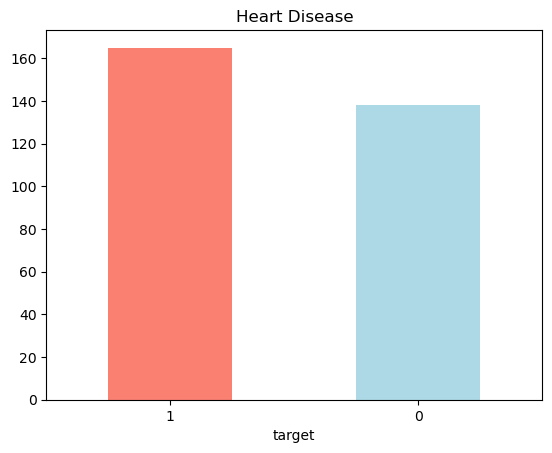

In [8]:
# Visualize the value counts with a bar graph
df["target"].value_counts().plot(
    kind="bar",
    color=["salmon", "lightblue"],
    title="Heart Disease",
)
plt.xticks(rotation=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing features


#### 1. Sex vs Target


In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
pd.crosstab(index=df["target"], columns=df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


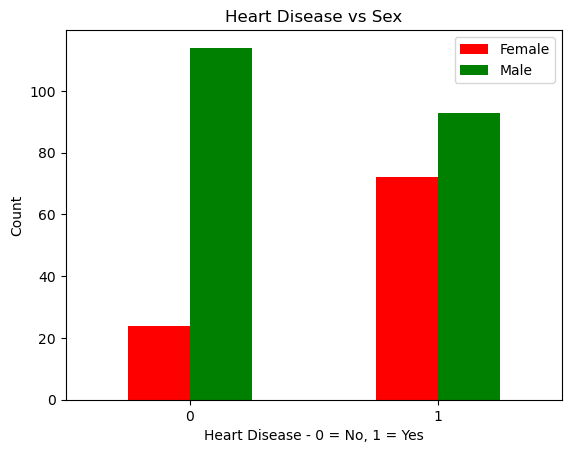

In [13]:
# Plotting the crosstab output
pd.crosstab(index=df["target"], columns=df["sex"]).plot(
    kind="bar",
    color=["red", "green"],
    title="Heart Disease vs Sex",
    legend=True,
    xlabel="Heart Disease - 0 = No, 1 = Yes",
    ylabel="Count",
)
plt.xticks(rotation=0)
plt.legend(["Female", "Male"])

#### 2. Age vs Maximum Heart Rate Achieved


Text(0, 0.5, 'Max Heart Rate')

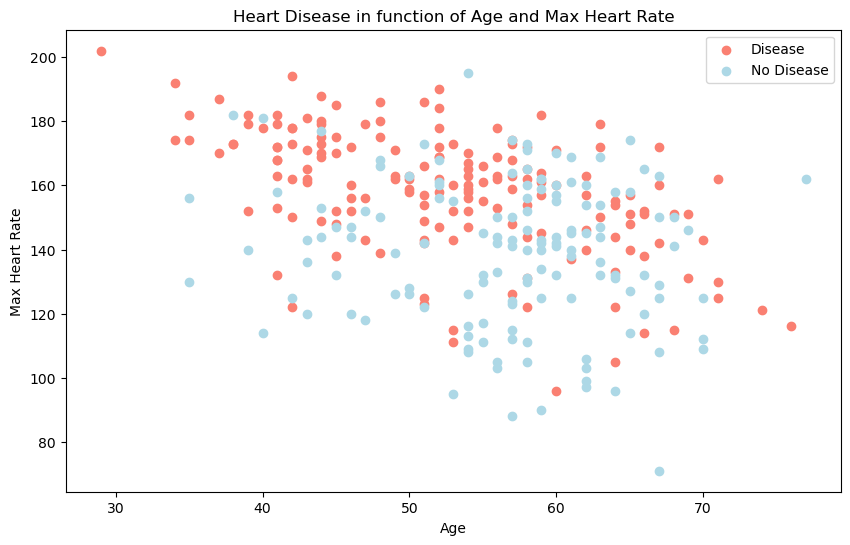

In [14]:
plt.figure(figsize=(10, 6))

# With heart disease
plt.scatter(df["age"][df.target == 1], df["thalach"][df.target == 1], c="salmon")

# Without heart disease
plt.scatter(df["age"][df.target == 0], df["thalach"][df.target == 0], c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate")

> It seems that younger people have higher maximum heart rate, and also have a higher chance of having heart disease. (😭)


<Axes: ylabel='Frequency'>

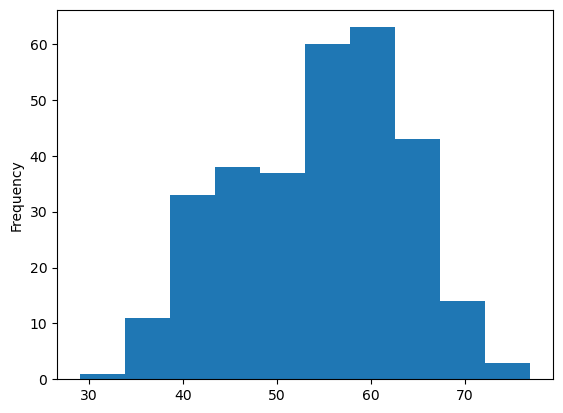

In [15]:
# On a side note, let's check the distribution of age

# df['age'].plot.kde()
df["age"].plot.hist()

#### 3. Chest Pain Type vs Target


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

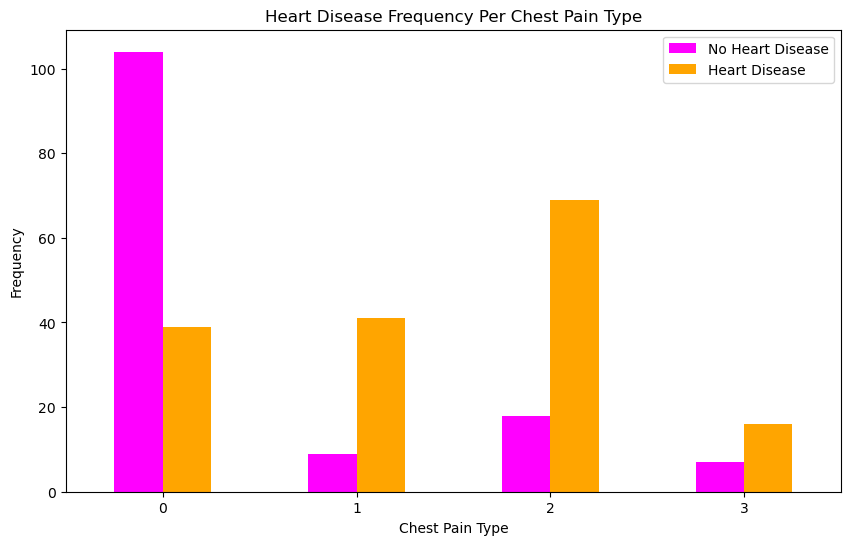

In [16]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar", figsize=(10, 6), color=["magenta", "orange"]
)

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0)

> It seems that `cp` type 1 (Atypical angina - chest pain not related to heart) has a higher chance of having heart disease.


### Correlation matrix (plot)


In [17]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

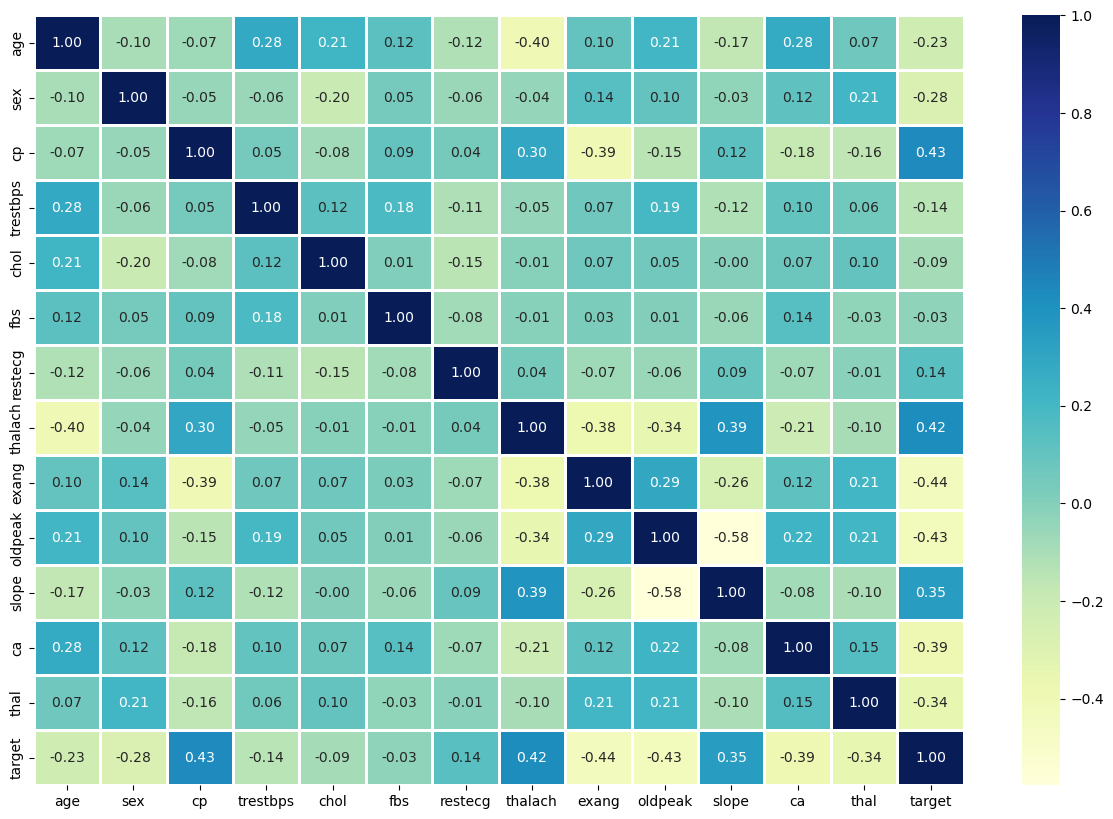

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.8, fmt=".2f", cmap="YlGnBu")

### 4. Modelling
